<a href="https://colab.research.google.com/github/Electromayonaise/Calculus-Notebooks/blob/main/CadenasDeMarkov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=http://www.acofi.edu.co/eiei2016/wp-content/uploads/2016/09/Logo-Universidad-ICESI.jpg width="300" height="200" align="center">

#**<big><big>Matemáticas Aplicadas ll</big></big><br><small>Depto. Matemáticas & Estadística / Facultad de Ingeniería</small><br><small>Cadenas de Markov**
<b>Autores:</b>
* <b>MARTÍN GÓMEZ - A00399958</b>
* <b>ALEJANDRO QUIÑONES - A00377013</b>
* <b>JULIO PRADO - A00399637</b>
* <b>PABLO GUZMAN - A00399523</b>


#Cadenas de Markov

Una cadena de Markov es una serie de eventos, en la cual la probabilidad de que ocurra un evento depende del evento inmediato anterior. Son comunmente utilizadas en economía, para analizar los patrones de compra, los deudores morosos, para planear las necesidades de personal y para analizar el reemplazo de equipo, etc. Básicamente,  permite encontrar la probabilidad de que un sistema se encuentre en un estado en particular en un momento dado.

## Matrices de transición en cadenas de markov

Como dijimos anteriormente,  en una cadena o sistema de Markov, un objeto o sistema se encuentra en uno de varios estados, y en cada paso de tiempo, existe una cierta probabilidad de que el sistema pase de un estado a otro. Estas probabilidades de transición se organizan en una matriz y conforman la matriz de transición.

Una matriz de transición se denota comúnmente como P y tiene las siguientes propiedades:

1. Cada columna de la matriz suma 1, lo que significa que el sistema debe estar en uno de los estados después de una transición.

2. Cada elemento de la matriz representa la probabilidad de pasar del estado correspondiente de la fila al estado correspondiente de la columna.

Basandonos en el libro, y el ejemplo del clima, podemos plantear un sistema de Markov que representa el clima diario, donde el clima puede ser soleado (S), nublado (N) o lluvioso (L)

$$
\begin{array}{c|ccc}
\text{Estado} & S & N & L \\
\hline
S & 0.5 & 0.2 & 0.1 \\
N & 0.25 & 0.4 & 0.2 \\
L & 0.25 & 0.3 & 0.7 \\
\end{array}
$$

Esta matriz de transición representa un sistema donde:

-Si el sistema está en el estado Soleado (S) en un momento dado, hay un 50% de probabilidad de que permanezca Soleado en el siguiente paso (0.5), un 25% de probabilidad de que se vuelva Nublado (0.25) y un 25% de probabilidad de que se vuelva Lluvioso (0.25).

-Si el sistema está en el estado Nublado (N) en un momento dado, hay un 20% de probabilidad de que cambie a Soleado (0.2), un 40% de probabilidad de que permanezca Nublado (0.4) y un 30% de probabilidad de que se vuelva Lluvioso (0.3).

-Si el sistema está en el estado Lluvioso (L) en un momento dado, hay un 10% de probabilidad de que cambie a Soleado (0.1), un 20% de probabilidad de que se vuelva Nublado (0.2) y un 70% de probabilidad de que permanezca Lluvioso (0.7).


## Matriz de transición regular

Una matriz de transición T de un proceso de Markov es regular si todas las entradas de alguna potencia de T son positivas. Un proceso de Markov es regular si su matriz de transición es regular.





In [ ]:
import numpy as np

def es_matriz_regular(matriz_transicion, max_potencia):
    for n in range(1, max_potencia + 1):
        matriz_potencia = np.linalg.matrix_power(matriz_transicion, n)
        if np.all(matriz_potencia > 0):
            return True, n
    return False, None

# Define la matriz de transición
matriz_transicion = np.array([
    [0.6, 1],
    [0.4, 0]
])

# Máxima potencia a la que elevar la matriz para verificar la regularidad
max_potencia = 10

es_regular, potencia_regular = es_matriz_regular(matriz_transicion, max_potencia)

if es_regular:
    print("La matriz de transición es regular.")
    print(f"Se alcanza la condición de regularidad en la potencia {potencia_regular}.")
else:
    print("La matriz de transición no es regular.")



La matriz de transición es regular.
Se alcanza la condición de regularidad en la potencia 2.


##Vectores de estado
Estos consisten en vectores que almacenan la probabilidad de que el sistema se encuentre en cualquiera de sus estados posibles dado un período de observación k.

##Estado de equlibrio
Este consiste en un estado en el que , cuando el tiempo tiende a infinito, los vectores de estado se estabilizan y se presentan muy pocos cambios entre estos. En el ejemplo de abajo, se observa como a medida de que se aumentan

In [ ]:
import numpy as np

matriz_transicion = np.array([
    [0.67, 0.5],
    [0.33, 0.5]
])

vector_estado_inicial = np.array([1, 0])
vector_estado_actual = vector_estado_inicial.copy()

tolerancia = 1e-6

for i in range(1, 51):
    print("Período i =", i)
    print("Vector de estado actual:", vector_estado_actual)

    vector_estado_siguiente = np.dot(matriz_transicion, vector_estado_actual)

    # Verificamos si el cambio en el vector de estado es pequeño (dentro de la tolerancia)
    if np.all(np.abs(vector_estado_siguiente - vector_estado_actual) < tolerancia):
        print("El sistema ha alcanzado un estado de equilibrio en el período", i)
        break

    vector_estado_actual = vector_estado_siguiente

Período i = 1
Vector de estado actual: [1 0]
Período i = 2
Vector de estado actual: [0.67 0.33]
Período i = 3
Vector de estado actual: [0.6139 0.3861]
Período i = 4
Vector de estado actual: [0.604363 0.395637]
Período i = 5
Vector de estado actual: [0.60274171 0.39725829]
Período i = 6
Vector de estado actual: [0.60246609 0.39753391]
Período i = 7
Vector de estado actual: [0.60241924 0.39758076]
Período i = 8
Vector de estado actual: [0.60241127 0.39758873]
Período i = 9
Vector de estado actual: [0.60240992 0.39759008]
El sistema ha alcanzado un estado de equilibrio en el período 9


En un proceso de Markov el vector de estado $x^{n+1}$ el cual representa el $k + 1$ estado de observación está definido por la matriz de transición y el estado anterior como sigue:
$$x^{(n+1)} = Tx^{(n)}$$
Por tanto, la matriz de transición y el vector de estado inicial determinan por
completo todos los demás vectores de estado. Lo que equivale a:
$$x^{(n)} = T^{n} * x^{0}$$

##Vector de estado estacionario

Un vector de estado estacionario, denotado como $\mathbf{u}$, de una matriz de transición regular $T$ en un proceso de Markov es una distribución de probabilidad que no cambia con el tiempo. Es decir, $\mathbf{u}$ satisface las siguientes propiedades:

  $T \mathbf{u_{i-1}} = \mathbf{u_i}$, lo cual implica que al aplicar la matriz de transición $T$ al vector de estado estacionario, se obtiene el mismo vector $\mathbf{u_i}$.
    
  El sistema homogéneo $(In - T)\mathbf{u} = 0$ tiene una única solución $\mathbf{u}$ que es un vector de probabilidad, es decir, $u_i \geq 0$ para todo $i$ y $u_1 + u_2 + \ldots + u_n = 1$.


Además, se pueden utilizar dos procedimientos para calcular el vector de estado estacionario:

##Primer procedimiento


  1. Calculamos las potencias $T^n \mathbf{x}$, donde $\mathbf{x}$ es cualquier vector de probabilidad.

  2. El vector de estado estacionario $\mathbf{u}$ es el límite de las potencias $T^n \mathbf{x}$.

##Segundo procedimiento

  1. Resolvemos el sistema homogéneo $(In - T)\mathbf{u} = 0$.

  2. De la infinidad de soluciones obtenidas en el paso 1, determinamos una única solución $\mathbf{u}$, al exigir que sus componentes satisfagan la ecuación $u_1 + u_2 + \ldots + u_n = 1$.





#Ejercicios Cadenas de Markov

1) ¿Cuál de las siguientes matrices de transición son regulares?
$$
A =
\begin{bmatrix}
0 & \frac{1}{2}\\
1 & \frac{1}{2}
\end{bmatrix}\\
$$
$$
B =
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & \frac{1}{2}\\
\frac{1}{2} & 0 & \frac{1}{2}
\end{bmatrix}
$$
$$
C =
\begin{bmatrix}
1 & \frac{1}{3} & 0 \\
0 & \frac{1}{3} & 1\\
0 & \frac{1}{3} & 0
\end{bmatrix}
$$

In [ ]:
import numpy as np

matriz = np.array([[0, 1/2],
                   [1, 1/2]])

for i in range(2,4):
  resultado = np.linalg.matrix_power(matriz, i)
  print("Matriz elevada a la potencia", i, ":\n", resultado)

Matriz elevada a la potencia 2 :
 [[0.5  0.25]
 [0.5  0.75]]
Matriz elevada a la potencia 3 :
 [[0.25  0.375]
 [0.75  0.625]]


Observamos que a partir de $A^{2}$ cada componente $A_{i,j} > 0$, por lo tanto es una matriz regular

In [ ]:
import numpy as np

matriz = np.array([[1/2, 0, 0],
                   [0, 1, 1/2],
                   [1/2, 0, 1/2]])

for i in range(2,6):
  resultado = np.linalg.matrix_power(matriz, i)
  print("Matriz elevada a la potencia", i, ":\n", resultado)

Matriz elevada a la potencia 2 :
 [[0.25 0.   0.  ]
 [0.25 1.   0.75]
 [0.5  0.   0.25]]
Matriz elevada a la potencia 3 :
 [[0.125 0.    0.   ]
 [0.5   1.    0.875]
 [0.375 0.    0.125]]
Matriz elevada a la potencia 4 :
 [[0.0625 0.     0.    ]
 [0.6875 1.     0.9375]
 [0.25   0.     0.0625]]
Matriz elevada a la potencia 5 :
 [[0.03125 0.      0.     ]
 [0.8125  1.      0.96875]
 [0.15625 0.      0.03125]]


Observamos que sin importar cuanto iteremos, los valores de $B_{0,1},B_{0,2},B_{2,1}$ siguen siendo 0, por lo tanto no es regular

In [ ]:
import numpy as np

matriz = np.array([[1, 1/3, 0],
                   [0, 1/3, 1],
                   [0, 1/3, 0]])

for i in range(2,6):
  resultado = np.linalg.matrix_power(matriz, i)
  print("Matriz elevada a la potencia", i, ":\n", resultado)

Matriz elevada a la potencia 2 :
 [[1.         0.44444444 0.33333333]
 [0.         0.44444444 0.33333333]
 [0.         0.11111111 0.33333333]]
Matriz elevada a la potencia 3 :
 [[1.         0.59259259 0.44444444]
 [0.         0.25925926 0.44444444]
 [0.         0.14814815 0.11111111]]
Matriz elevada a la potencia 4 :
 [[1.         0.67901235 0.59259259]
 [0.         0.2345679  0.25925926]
 [0.         0.08641975 0.14814815]]
Matriz elevada a la potencia 5 :
 [[1.         0.75720165 0.67901235]
 [0.         0.16460905 0.2345679 ]
 [0.         0.0781893  0.08641975]]


Observamos que sin importar cuanto iteremos, los valores de $C_{1,0},C_{2,0}$ siguen siendo 0, por lo tanto no es regular

2) Demuestre que cada una de las siguientes matrices de transición alcanza un estado de equilibrio

$$
A =
\begin{bmatrix}
\frac{1}{2} & 1 \\
\frac{1}{2} & 0
\end{bmatrix}\\
$$
$$
B =
\begin{bmatrix}
\frac{1}{3} & 1 & \frac{1}{2}\\
\frac{1}{3} & 0 & \frac{1}{4}\\
\frac{1}{3} & 0 & \frac{1}{4}
\end{bmatrix}
$$

##Solución a partir de iterar

Potencias y probabilidades para la matriz A:
Potencia 0:
[[1. 0.]
 [0. 1.]]

Potencia 1:
[[0.5 1. ]
 [0.5 0. ]]

Potencia 2:
[[0.75 0.5 ]
 [0.25 0.5 ]]

Potencia 3:
[[0.625 0.75 ]
 [0.375 0.25 ]]

Potencia 4:
[[0.6875 0.625 ]
 [0.3125 0.375 ]]

Potencia 5:
[[0.65625 0.6875 ]
 [0.34375 0.3125 ]]

Potencia 6:
[[0.671875 0.65625 ]
 [0.328125 0.34375 ]]

Potencia 7:
[[0.6640625 0.671875 ]
 [0.3359375 0.328125 ]]

Potencia 8:
[[0.66796875 0.6640625 ]
 [0.33203125 0.3359375 ]]

Potencia 9:
[[0.66601562 0.66796875]
 [0.33398438 0.33203125]]

Potencia 10:
[[0.66699219 0.66601562]
 [0.33300781 0.33398438]]

Potencias y probabilidades para la matriz B:
Potencia 0:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Potencia 1:
[[0.33 1.   0.5 ]
 [0.33 0.   0.25]
 [0.33 0.   0.25]]

Potencia 2:
[[0.6039 0.33   0.54  ]
 [0.1914 0.33   0.2275]
 [0.1914 0.33   0.2275]]

Potencia 3:
[[0.486387 0.6039   0.51945 ]
 [0.247137 0.1914   0.235075]
 [0.247137 0.1914   0.235075]]

Potencia 4:
[[0.53121321 0.486387   0.524

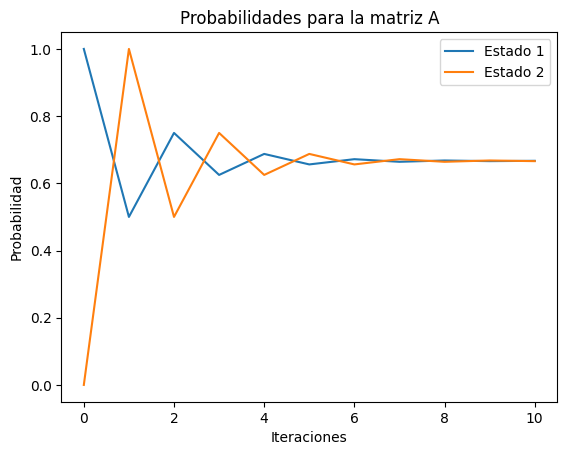

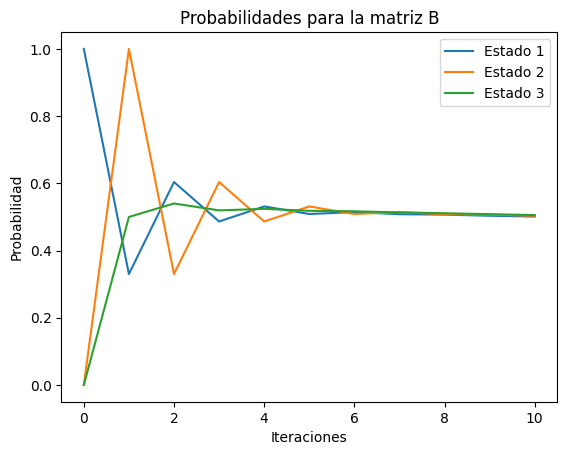

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[0.5, 1], [0.5, 0]])
B = np.array([[0.33, 1, 0.5], [0.33, 0, 0.25], [0.33, 0, 0.25]])

n = 10

def matrix_power_prob(M, n):
    powers = []
    probs = []
    for i in range(n+1):
        P = np.linalg.matrix_power(M, i)
        powers.append(P)
        probs.append(P[0])
    return powers, probs

powers_A, probs_A = matrix_power_prob(A, n)
powers_B, probs_B = matrix_power_prob(B, n)

print ("Potencias y probabilidades para la matriz A:")
for i in range(n+1):
    print(f"Potencia {i}:")
    print(powers_A[i])
    print()

print ("Potencias y probabilidades para la matriz B:")
for i in range(n+1):
    print(f"Potencia {i}:")
    print(powers_B[i])
    print()
#Matriz A
plt.figure()
plt.title("Probabilidades para la matriz A")
plt.xlabel("Iteraciones")
plt.ylabel("Probabilidad")
plt.plot(probs_A)
plt.legend(["Estado 1", "Estado 2"])
plt.show()
#Matriz B
plt.figure()
plt.title("Probabilidades para la matriz B")
plt.xlabel("Iteraciones")
plt.ylabel("Probabilidad")
plt.plot(probs_B)
plt.legend(["Estado 1", "Estado 2", "Estado 3"])
plt.show()

##Solución usando el vector propio
Para demostrar esto basta con encontrar el vector propio asociado a la matriz cuyo valor propio sea 1, lo cual nos indicaria que la distribución de probabilidad no cambia sin importar cuantas veces se aplique la matriz de transición

In [ ]:
import numpy as np

A = np.array([[1/2, 1],
              [1/2, 0]])

eigenvalues, eigenvectors = np.linalg.eig(A)

for i, eigenvalue in enumerate(eigenvalues):
    if np.isclose(eigenvalue, 1):
        equilibrium_vector = eigenvectors[:, i]
        equilibrium_vector /= equilibrium_vector.sum()

        print("Matriz A:")
        print("Vector propio asociado al valor propio 1 (distribución de equilibrio):")
        print(equilibrium_vector)

B = np.array([[1/3, 1, 1/2],
              [1/3, 0, 1/4],
              [1/3, 0, 1/4]])

eigenvalues, eigenvectors = np.linalg.eig(B)

for i, eigenvalue in enumerate(eigenvalues):
    if np.isclose(eigenvalue, 1):
        equilibrium_vector = eigenvectors[:, i]
        equilibrium_vector /= equilibrium_vector.sum()

        print("\nMatriz B:")
        print("Vector propio asociado al valor propio 1 (distribución de equilibrio):")
        print(equilibrium_vector)

Matriz A:
Vector propio asociado al valor propio 1 (distribución de equilibrio):
[0.66666667 0.33333333]

Matriz B:
Vector propio asociado al valor propio 1 (distribución de equilibrio):
[0.52941176 0.23529412 0.23529412]


3)Un psicólogo del comportamiento coloca todos los días una rata en una jaula con dos puertas, A y B. La rata puede pasar por la puerta A, en cuyo caso recibirá un choque eléctrico, o por la puerta B, con lo cual obtiene cierto alimento. Se registra la puerta por la que pasa la rata. Al inicio del experimento, un lunes, la rata tiene la misma probabilidad de pasar por la puerta A que por la puerta B. Después de pasar por la puerta A y recibir una descarga eléctrica, la probabilidad de volver a
pasar por la misma puerta al día siguiente es 0.3. Después de pasar por la puerta B y recibir alimento, la probabilidad de pasar por la misma puerta al día siguiente es 0.6.


Podemos definir la matriz de trasición $T$ como:
$$
T =
\begin{bmatrix}
0.3 & 0.4 \\
0.7 & 0.6
\end{bmatrix}\\
$$

Ahora el vector inicial $\vec{x}$ sería:
$$
\vec{x} =
\begin{bmatrix}
0.5 \\
0.5
\end{bmatrix}\\
$$
Debido a que la rata tiene las mismas probabilidades al iniciar el experimento

¿Cuál es la probabilidad de que la rata vuelva a pasar por la puerta A el jueves (el tercer día después del inicio del experimento)?


In [ ]:
import numpy as np

T = np.array([[0.3, 0.4],
              [0.7, 0.6]])

x = np.array([0.5, 0.5])
x1 = np.dot(T, x)
x2 = np.dot(T, x1)
x3 = np.dot(T, x2)

print(f"La probabilidad de que la rata pase por la puerta A el jueves es: {x3[0]*100}%")

La probabilidad de que la rata pase por la puerta A el jueves es: 36.349999999999994%


##Vector de estado estacionario

##Usando el primer procedimiento

In [ ]:
import numpy as np

T = np.array([[0.3, 0.4],
              [0.7, 0.6]])
x = np.array([0.5, 0.5])

delta = 1e-30

error = 1

while error > delta:
  new_x = np.dot(T, x)
  error = np.linalg.norm(new_x - x)
  x = new_x

print("El vector de estado estacionario es:", x)

El vector de estado estacionario es: [0.36363636 0.63636364]


##Usando el segundo procedimiento

In [ ]:
import numpy as np
from scipy.linalg import null_space

matriz = np.array([[0.3, 0.4], [0.7, 0.6]])
vector = np.array([0.5, 0.5])

n = len(matriz)
I = np.identity(n)
M = I - matriz

u = null_space(M)
u = u[:, 0]
u = u / np.sum(u)

print("El vector de estado estacionario es:", u)

El vector de estado estacionario es: [0.36363636 0.63636364]


4)
Un sistema de transporte colectivo entra en operacion. Las autoridades de transito han realizado estudios que predicen el porcentaje de quienes utilizaran el sistema colectivo (M) y el de las personas que seguiran manejando su auto (A). Se ha obtenido la siguiente matriz de transicion:

$$
T =
\begin{bmatrix}
0.7 & 0.2 \\
0.3 & 0.8
\end{bmatrix}\\
$$

Suponga que la poblacion del area permanece constante y que al principio 30 % de la gente se traslada en el transporte colectivo y 70 % en automovil.
- ¿Que porcentaje utilizara el sistema de transporte colectivo despues de un año?, ¿Despues de dos años?
- ¿En el largo plazo, ¿que porcentaje empleara el sistema de transporte colectivo?

$$
\vec{x} =
\begin{bmatrix}
0.3 \\
0.7
\end{bmatrix}\\
$$

###Método Iterativo(Límites)

In [ ]:
import numpy as np

T = np.array([[0.7, 0.2], [0.3, 0.8]])

x = np.array([0.3, 0.7])

x1 = T.dot(x)
print(f"Después de un año, el {x1[0]*100:.1f} % de la gente usará el transporte colectivo y el {x1[1]*100:.1f} % el automóvil.")

x2 = T.dot(x1)
print(f"Después de dos años, el {x2[0]*100:.1f} % de la gente usará el transporte colectivo y el {x2[1]*100:.1f} % el automóvil.")

A = T - np.eye(2)
b = np.zeros(2)
c = np.ones(2)

delta = 1e-12

error = 1

while error > delta:
  new_x = np.dot(T, x)
  error = np.linalg.norm(new_x - x)
  x = new_x

print(f"En el largo plazo, el {x[0]*100:.1f} % de la gente usará el transporte colectivo y el {x[1]*100:.1f} % el automóvil.")

Después de un año, el 35.0 % de la gente usará el transporte colectivo y el 65.0 % el automóvil.
Después de dos años, el 37.5 % de la gente usará el transporte colectivo y el 62.5 % el automóvil.
En el largo plazo, el 40.0 % de la gente usará el transporte colectivo y el 60.0 % el automóvil.


###Usando Ecuación Homogénea

In [ ]:
import numpy as np

T = np.array([[0.7, 0.2], [0.3, 0.8]])

x = np.array([0.3, 0.7])

x1 = T.dot(x)
print(f"Después de un año, el {x1[0]*100:.1f} % de la gente usará el transporte colectivo y el {x1[1]*100:.1f} % el automóvil.")

x2 = T.dot(x1)
print(f"Después de dos años, el {x2[0]*100:.1f} % de la gente usará el transporte colectivo y el {x2[1]*100:.1f} % el automóvil.")

A = T - np.eye(2)
b = np.zeros(2)
c = np.ones(2)

x3 = np.linalg.lstsq(np.vstack([A, c]), np.hstack([b, 1]), rcond=None)[0]

print(f"En el largo plazo, el {x3[0]*100:.1f} % de la gente usará el transporte colectivo y el {x3[1]*100:.1f} % el automóvil.")

Después de un año, el 35.0 % de la gente usará el transporte colectivo y el 65.0 % el automóvil.
Después de dos años, el 37.5 % de la gente usará el transporte colectivo y el 62.5 % el automóvil.
En el largo plazo, el 40.0 % de la gente usará el transporte colectivo y el 60.0 % el automóvil.
